[Reference](https://medium.com/@estebanthi/classification-analysis-use-case-the-iris-dataset-99b3902b708b)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.data.shape)
print(iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


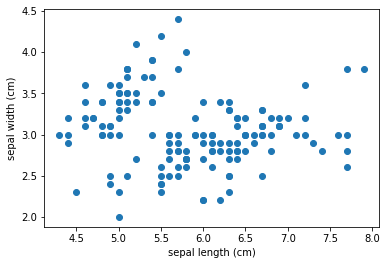

In [3]:
import matplotlib.pyplot as plt

plt.scatter(iris.data[:, 0], iris.data[:, 1])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(iris.data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

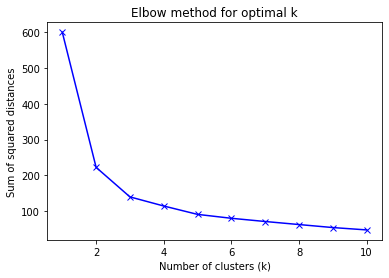

In [6]:
from sklearn.cluster import KMeans
import numpy as np

# Calculate sum of squared distances for k values ranging from 1 to 10
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [9]:
from sklearn.decomposition import PCA

# Calculate first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

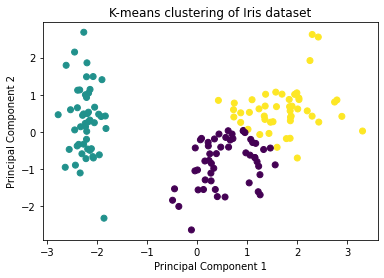

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clustering of Iris dataset')
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.45994823920518635


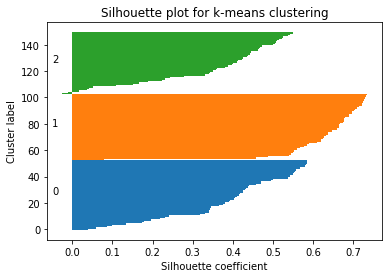

In [12]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kmeans.n_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

In [13]:
for i in range(kmeans.n_clusters):
    print("Cluster", i)
    print("Number of data points:", len(X[kmeans.labels_ == i]))
    print("Mean:", np.mean(X[kmeans.labels_ == i], axis=0))
    print("Standard deviation:", np.std(X[kmeans.labels_ == i], axis=0))
    print("")

Cluster 0
Number of data points: 53
Mean: [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
Standard deviation: [0.48666241 0.57986372 0.31550929 0.40594943]

Cluster 1
Number of data points: 50
Mean: [-1.01457897  0.85326268 -1.30498732 -1.25489349]
Standard deviation: [0.42281163 0.86382391 0.0977141  0.13732713]

Cluster 2
Number of data points: 47
Mean: [1.13597027 0.08842168 0.99615451 1.01752612]
Standard deviation: [0.58812089 0.59680897 0.35875065 0.43079594]

